<a href="https://www.kaggle.com/code/hotbox12/notebookbcca09eb41?scriptVersionId=136612994" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip',nrows=1250000)

In [3]:
df_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
print('Number of rows in train set', df_train.shape[0])
print('Number of Unique Customer in train set:', len(set(df_train.ncodpers.unique())))

Number of rows in train set 1250000
Number of Unique Customer in train set: 629921


In [5]:
df_train.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado               12876
pais_residencia            12876
sexo                       12880
age                            0
fecha_alta                 12876
ind_nuevo                  12876
antiguedad                     0
indrel                     12876
ult_fec_cli_1t           1248448
indrel_1mes                12876
tiprel_1mes                12876
indresi                    12876
indext                     12876
conyuemp                 1249822
canal_entrada              12969
indfall                    12876
tipodom                    12876
cod_prov                   20229
nomprov                    20229
ind_actividad_cliente      12876
renta                     222120
segmento                   13009
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [6]:
#We can see that the number "12876" appeared in some columns. That might be the same rows .So, let check if it is the same rows  
df_train.loc[df_train["pais_residencia"].isnull(),["ind_empleado","ind_nuevo","indresi"]].head()

,ind_empleado,ind_nuevo,indresi
261,NaN,NaN,NaN
1029,NaN,NaN,NaN
1063,NaN,NaN,NaN
1154,NaN,NaN,NaN
1779,NaN,NaN,NaN


In [7]:
#Yes, It's the same rows

In [8]:
#There are two columns "ult_fec_cli_1t" and "conyuemp" with almost all values are missing. 
#So, I will delete them from the dataframe.

In [9]:
df_train = df_train.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

In [10]:
#NUMERICAL ANALYSIS

In [11]:
df_train.age = pd.to_numeric(df_train.age, errors = 'coerce')
df_train.antiguedad = pd.to_numeric(df_train.antiguedad, errors = 'coerce')
df_train.indrel_1mes = pd.to_numeric(df_train.indrel_1mes, errors = 'coerce')

Text(0, 0.5, 'Count')

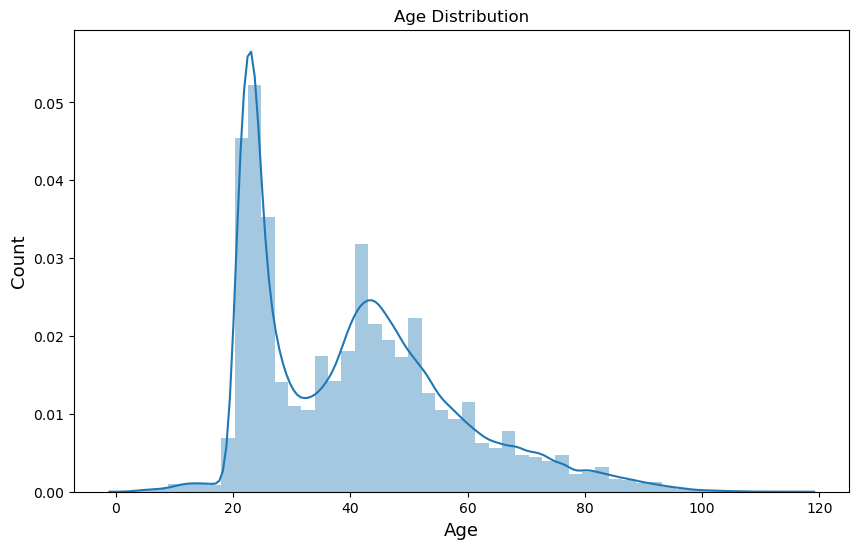

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df_train["age"].dropna(),
               bins=50)
plt.title("Age Distribution")
plt.xlabel("Age", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

In [13]:
# Replace ages below 18 with the mean of ages between 18 and 30
age_mean_18_30 = df_train[(df_train['age'] >= 18) & (df_train['age'] <= 30)]['age'].mean()
df_train.loc[df_train['age'] < 18, 'age'] = age_mean_18_30

# Replace ages above 100 with the mean of ages between 30 and 100
age_mean_30_100 = df_train[(df_train['age'] >= 30) & (df_train['age'] <= 100)]['age'].mean()
df_train.loc[df_train['age'] > 100, 'age'] = age_mean_30_100

# Fill remaining missing values in the age column with the mean age
mean_age = df_train['age'].mean()
df_train['age'].fillna(mean_age, inplace=True)

# Convert age column to integer type
df_train['age'] = df_train['age'].astype(int)


Text(0, 0.5, 'Count')

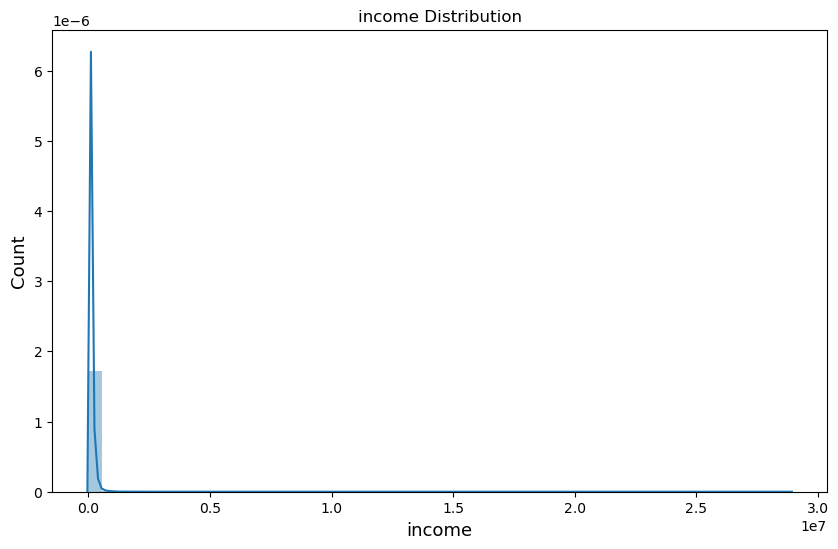

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df_train["renta"].dropna(),
               bins=50)
plt.title("income Distribution")
plt.xlabel("income", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

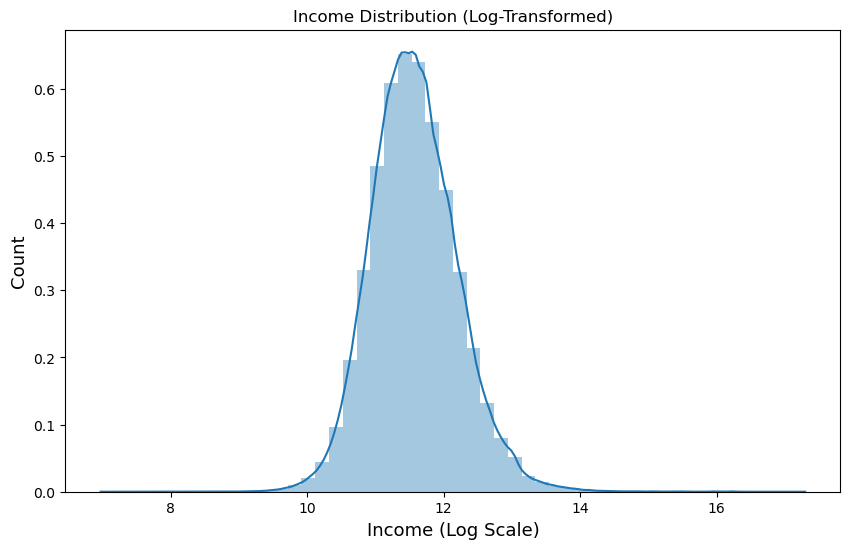

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Compute the log of "renta" and drop any missing values
log_rents = np.log(df_train["renta"].dropna())

# Plot the distribution of log-rents
sns.distplot(log_rents, bins=50)

# Set the title and labels
plt.title("Income Distribution (Log-Transformed)")
plt.xlabel("Income (Log Scale)", fontsize=13)
plt.ylabel("Count", fontsize=13)

# Show the plot
plt.show()


In [16]:
#df_train["renta"].fillna(df_train["renta"].mean(), inplace=True)
df_train["renta"].fillna(0, inplace=True)
#As we are using Tree based models I thought it would be best to let missing values be 0

In [17]:
df_train.loc[df_train.antiguedad.isnull(), 'antiguedad'] = 0
df_train.loc[df_train.antiguedad < 0, 'antiguedad'] = 0

In [18]:
df_train.loc[df_train['cod_prov'].isnull(), 'cod_prov'] = -1

In [19]:
# Replace missing values in 'ind_nomina_ult1' column with 0
df_train.loc[df_train['ind_nomina_ult1'].isnull(), 'ind_nomina_ult1'] = 0
df_train.loc[df_train['ind_nom_pens_ult1'].isnull(), 'ind_nom_pens_ult1'] = 0

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250000 entries, 0 to 1249999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1250000 non-null  object 
 1   ncodpers               1250000 non-null  int64  
 2   ind_empleado           1237124 non-null  object 
 3   pais_residencia        1237124 non-null  object 
 4   sexo                   1237120 non-null  object 
 5   age                    1250000 non-null  int64  
 6   fecha_alta             1237124 non-null  object 
 7   ind_nuevo              1237124 non-null  float64
 8   antiguedad             1250000 non-null  float64
 9   indrel                 1237124 non-null  float64
 10  indrel_1mes            1237124 non-null  float64
 11  tiprel_1mes            1237124 non-null  object 
 12  indresi                1237124 non-null  object 
 13  indext                 1237124 non-null  object 
 14  canal_entrada     

In [21]:
#CATEGORICAL ANALYSIS
cols = ["ind_empleado","pais_residencia","sexo","ind_nuevo","indrel","indrel_1mes","tiprel_1mes",
        "indresi","indext","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","segmento"]

In [22]:
#print the unique values
for col in cols:
    unique_values = df_train[col].unique()
    print(f"Unique values for {col}:\n{unique_values}\n")

Unique values for ind_empleado:
['N' nan 'A' 'B' 'F' 'S']

Unique values for pais_residencia:
['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ']

Unique values for sexo:
['H' 'V' nan]

Unique values for ind_nuevo:
[ 0. nan  1.]

Unique values for indrel:
[ 1. nan 99.]

Unique values for indrel_1mes:
[ 1. nan  3.  2.]

Unique values for tiprel_1mes:
['A' 'I' nan 'P']

Unique values for indresi:
['S' nan 'N']

Unique values for indext:
['N' 'S' nan]

Unique values for c

In [23]:
df_train['ind_empleado'].value_counts()

N    1236165
B        387
A        288
F        282
S          2
Name: ind_empleado, dtype: int64

In [24]:
#We can impute the 'N' which  is occuring highest

In [25]:
df_train['pais_residencia'].value_counts()

ES    1229769
FR        576
AR        551
DE        513
GB        508
       ...   
TG          2
TN          2
LB          2
GE          2
BZ          2
Name: pais_residencia, Length: 113, dtype: int64

In [26]:
df_train['sexo'].value_counts()

V    678906
H    558214
Name: sexo, dtype: int64

In [27]:
#PLOTS

Number of unique values in ind_empleado : 6


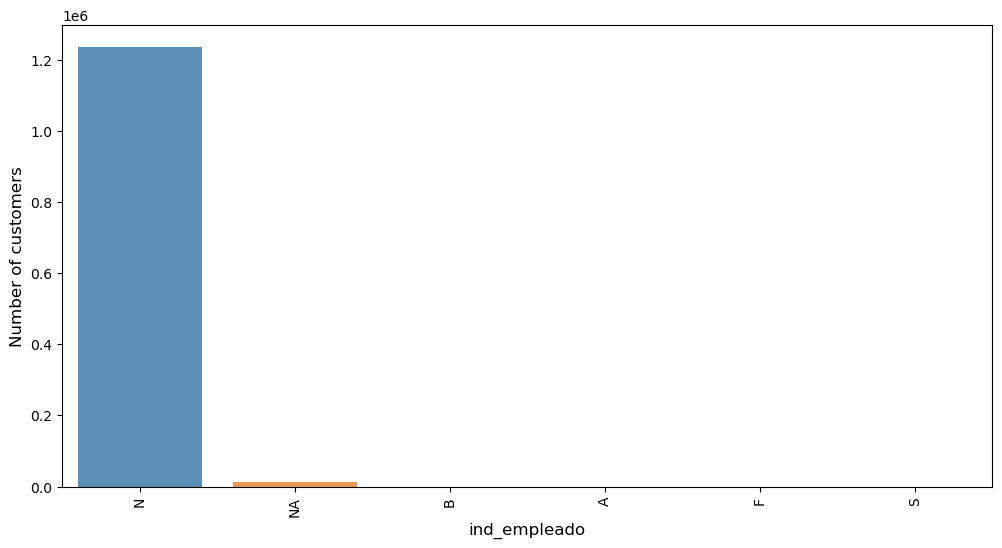


Number of unique values in pais_residencia : 114


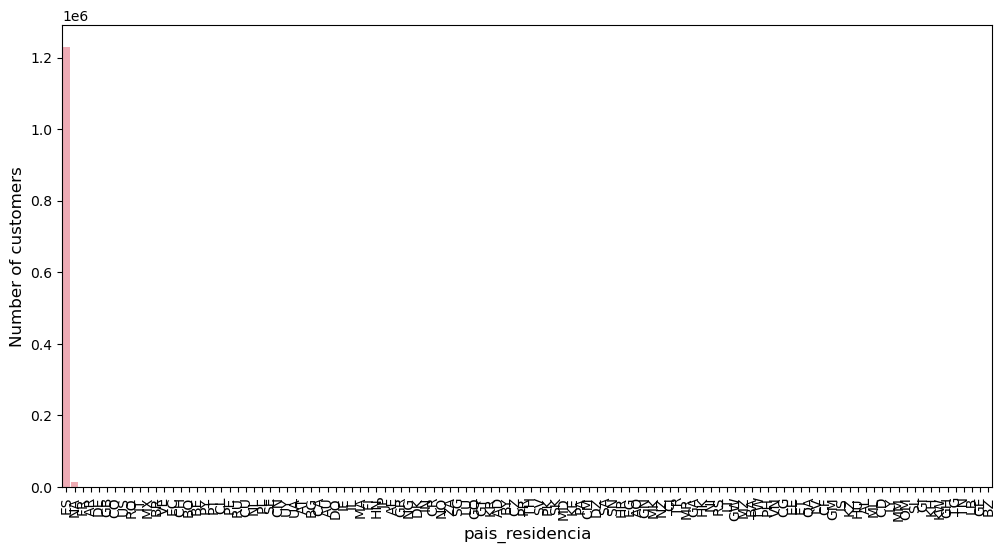


Number of unique values in sexo : 3


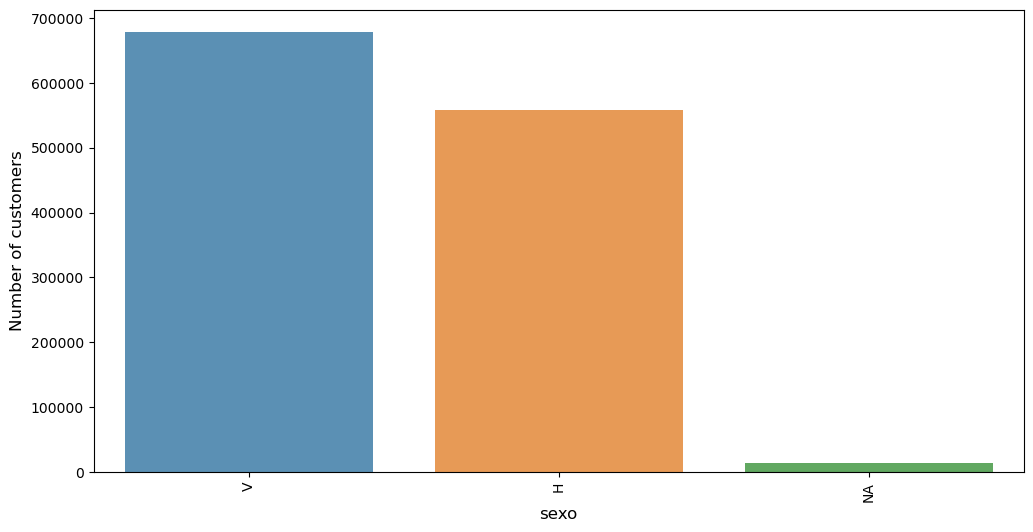


Number of unique values in ind_nuevo : 3


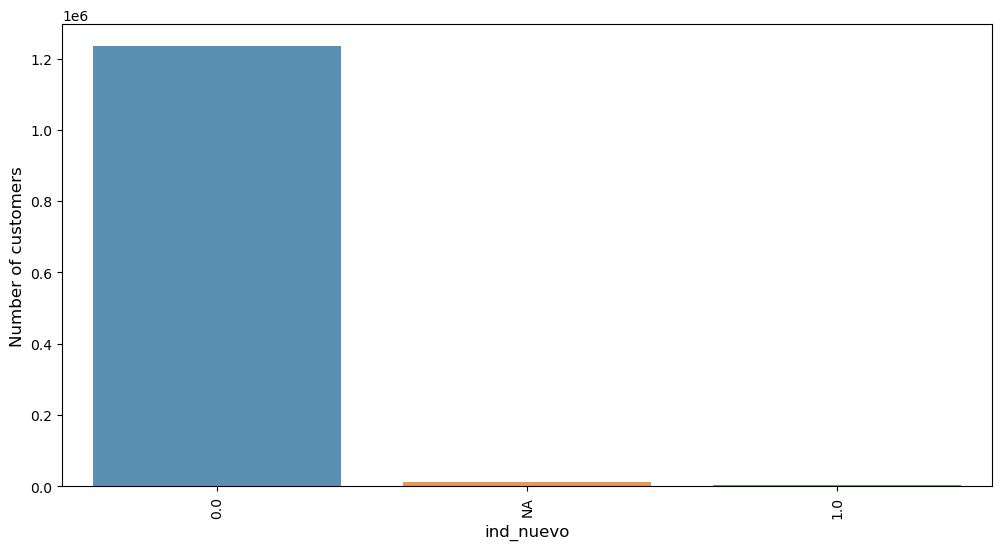


Number of unique values in indrel : 3


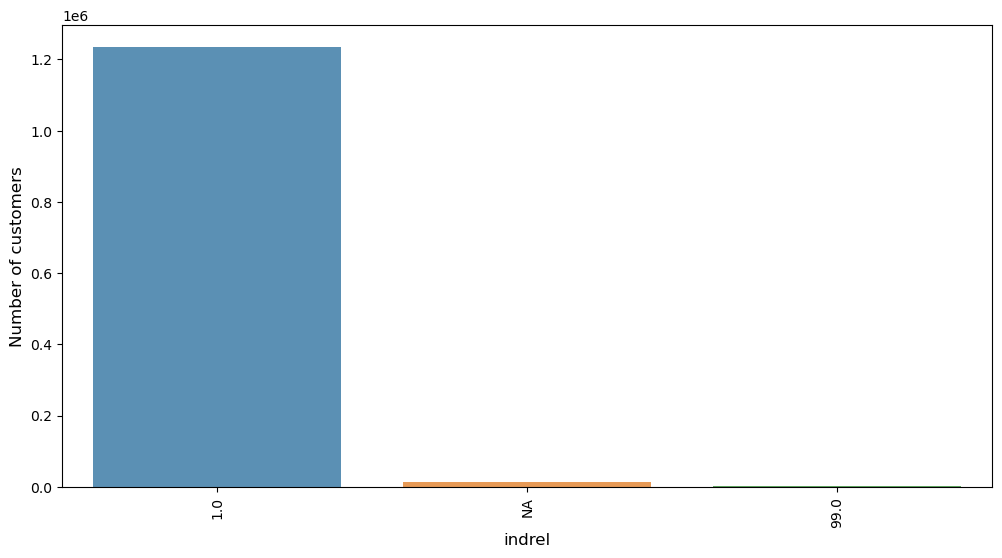


Number of unique values in indrel_1mes : 4


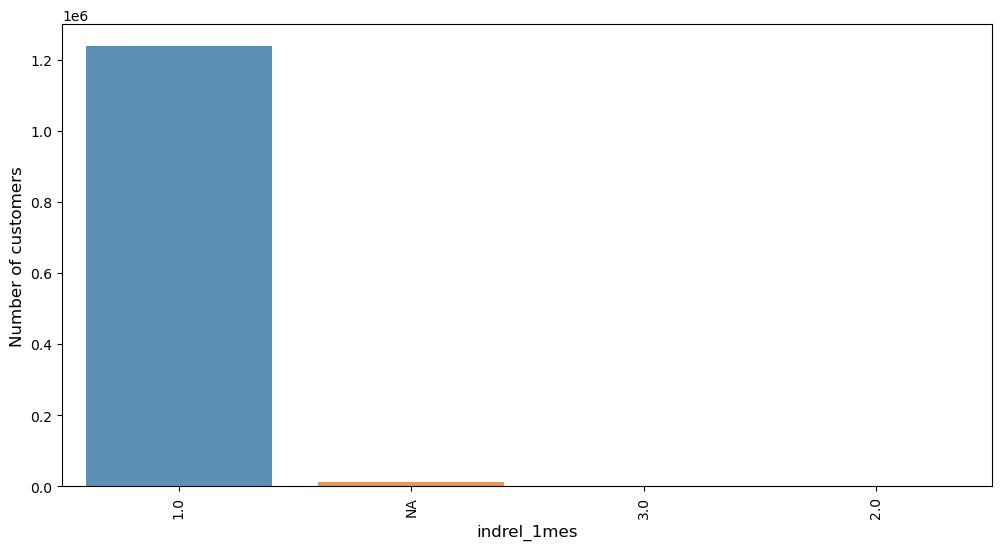


Number of unique values in tiprel_1mes : 4


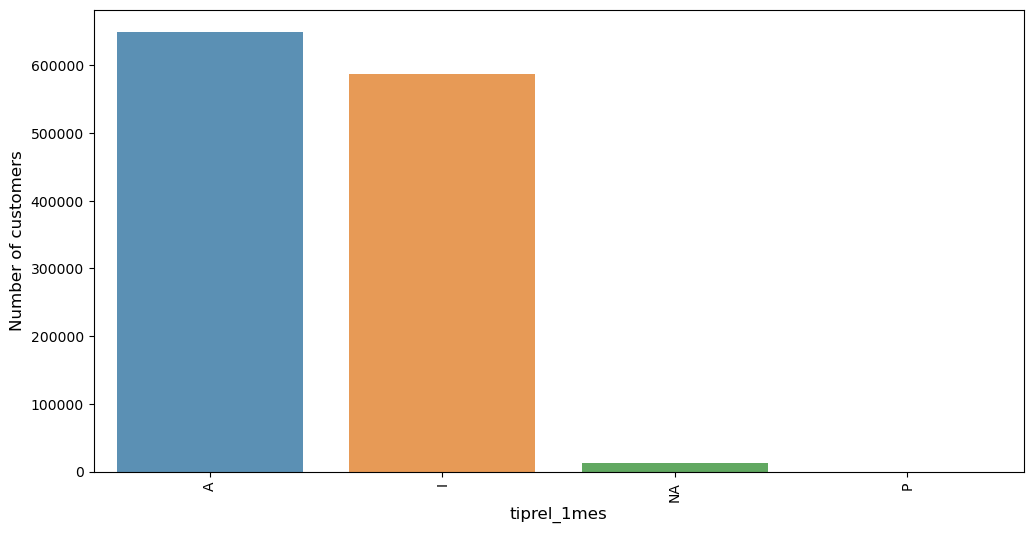


Number of unique values in indresi : 3


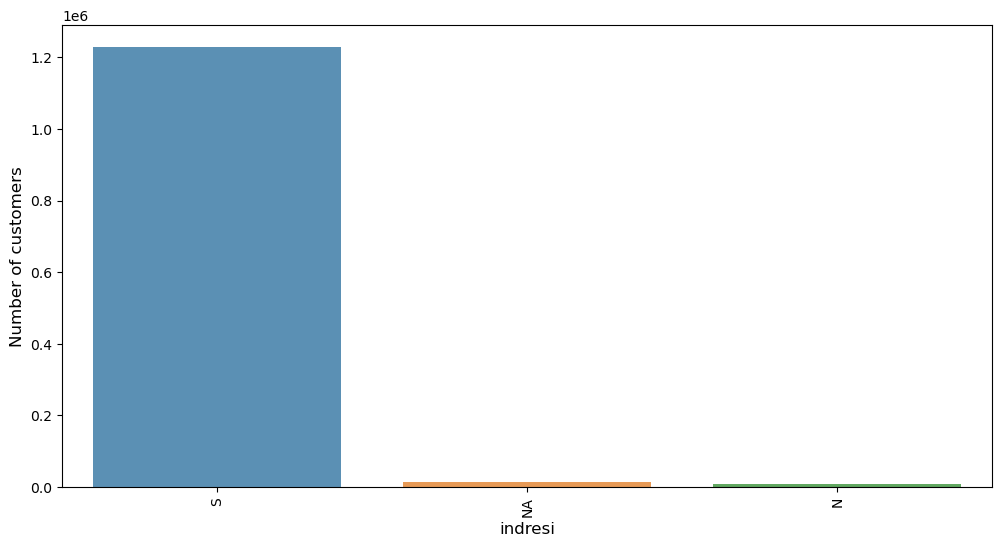


Number of unique values in indext : 3


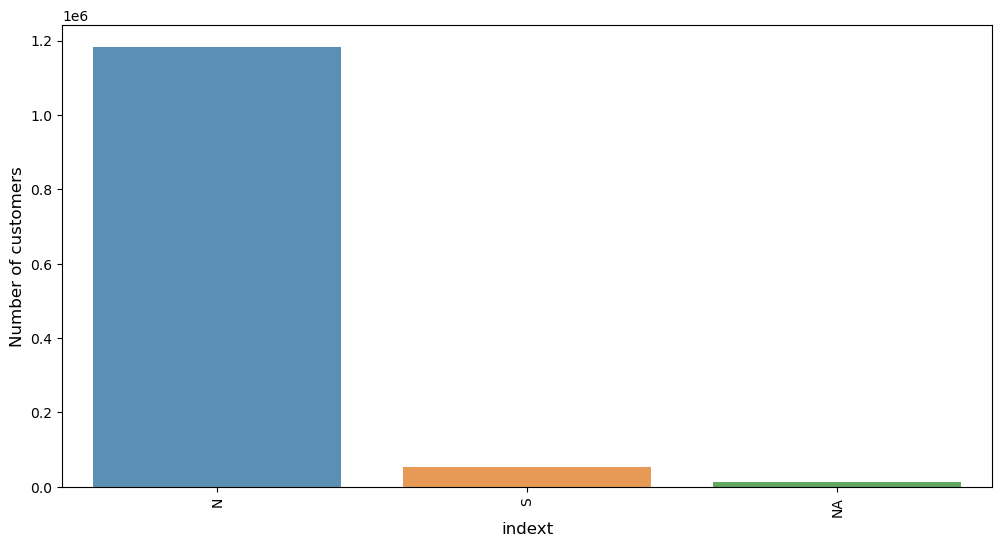


Number of unique values in canal_entrada : 157


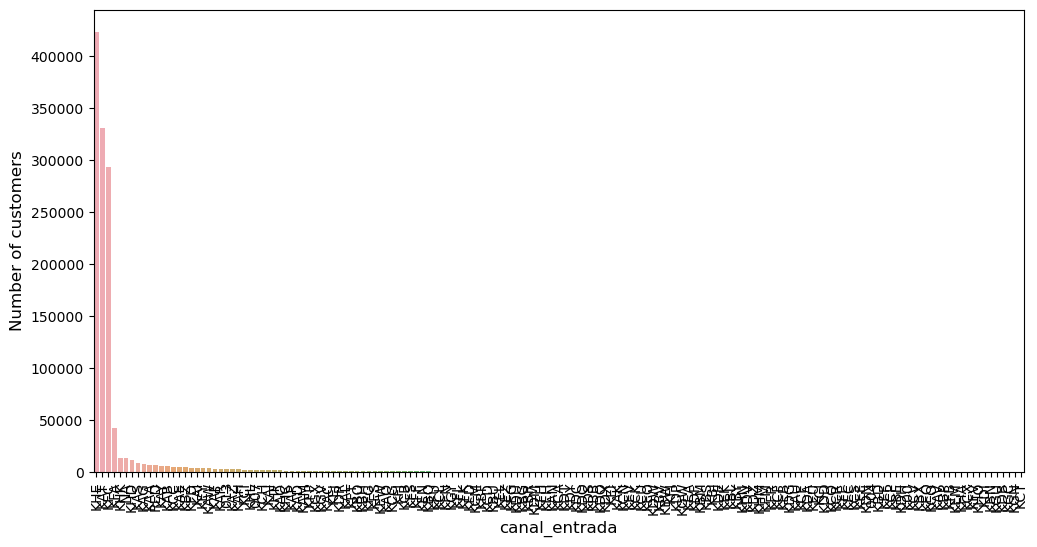


Number of unique values in indfall : 3


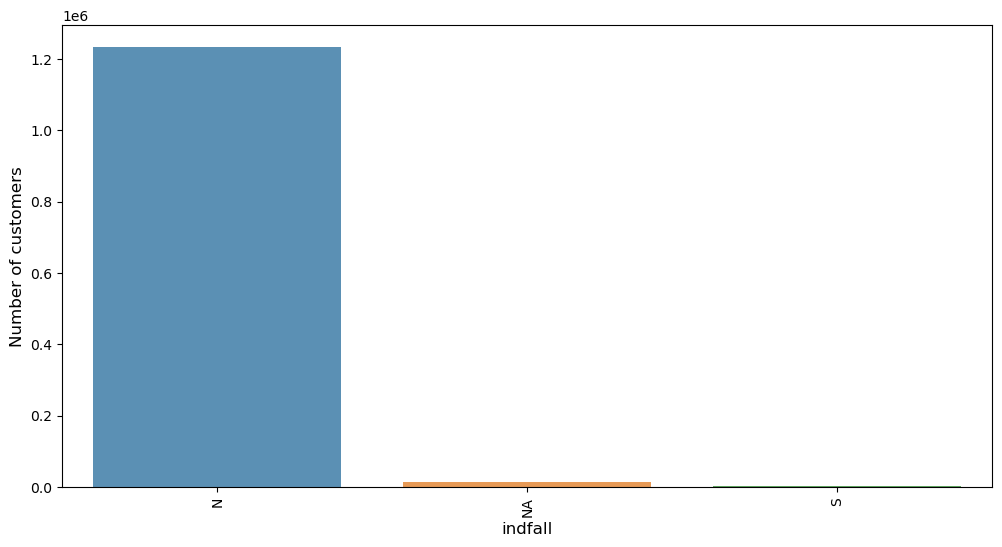


Number of unique values in tipodom : 2


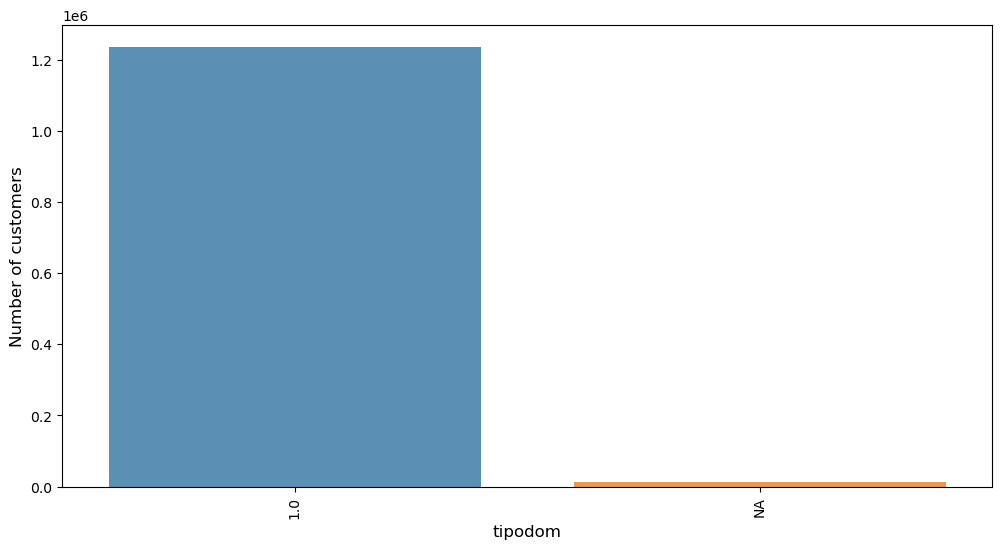


Number of unique values in cod_prov : 53


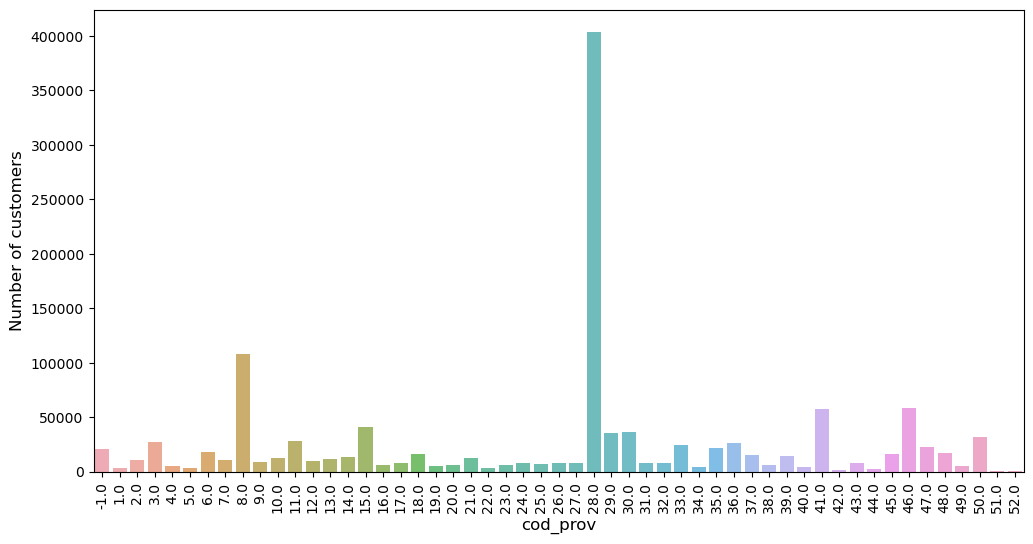


Number of unique values in nomprov : 53


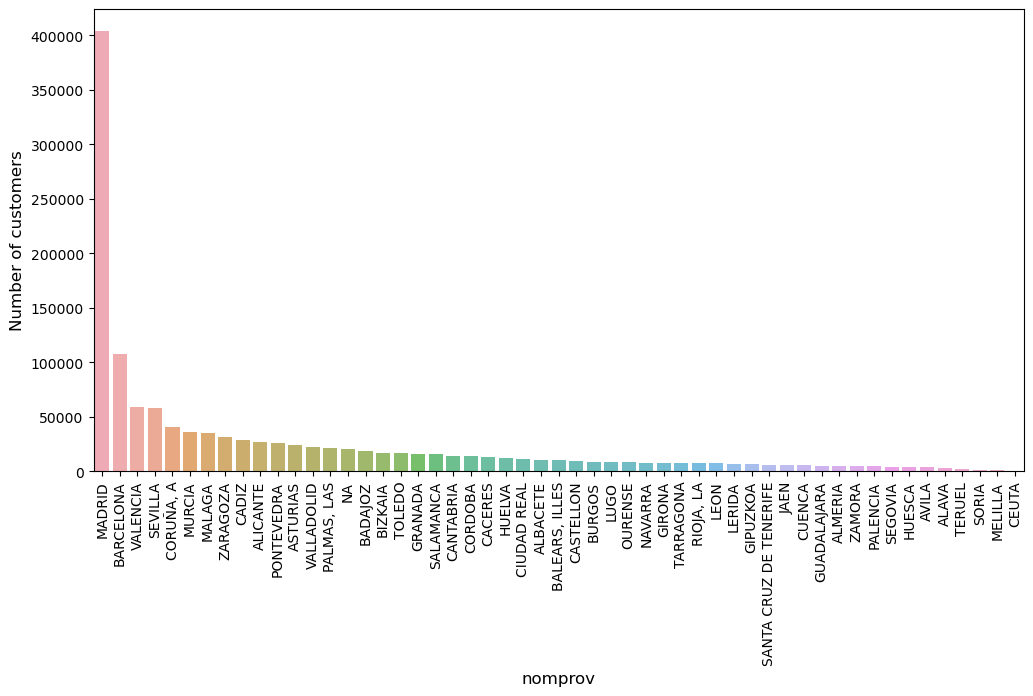


Number of unique values in ind_actividad_cliente : 3


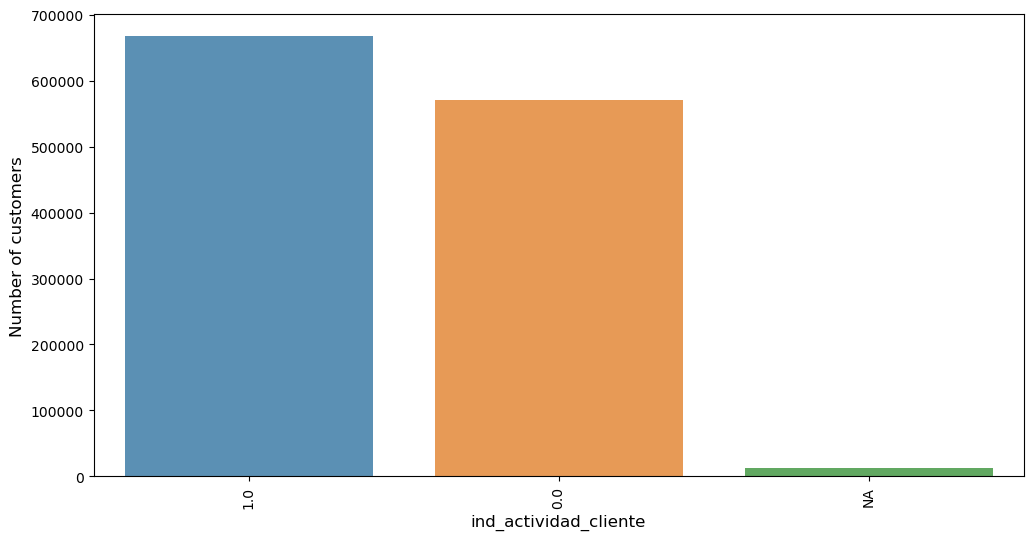


Number of unique values in segmento : 4


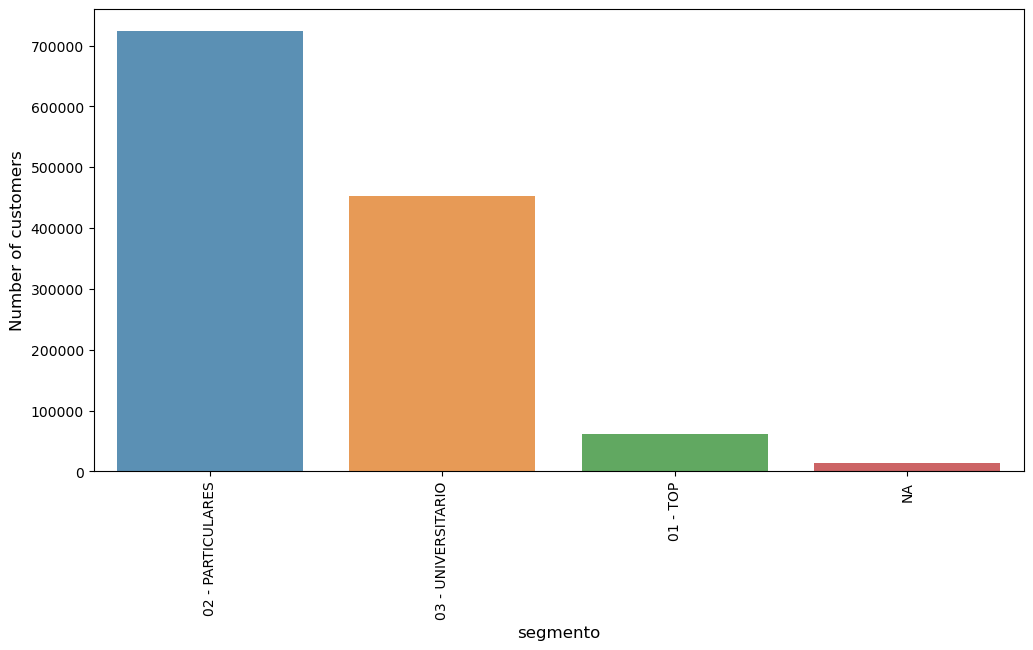

In [28]:
for col in cols:
    df_sample = df_train.fillna('NA')
    unique_values = df_sample[col].unique()
    num_unique = len(unique_values)
    print("Number of unique values in", col, ":", num_unique)

    if num_unique < 200:
        value_counts = df_sample[col].value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, alpha=0.8)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Number of customers', fontsize=12)
        plt.xticks(rotation='vertical')
        plt.show()

    print()


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250000 entries, 0 to 1249999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1250000 non-null  object 
 1   ncodpers               1250000 non-null  int64  
 2   ind_empleado           1237124 non-null  object 
 3   pais_residencia        1237124 non-null  object 
 4   sexo                   1237120 non-null  object 
 5   age                    1250000 non-null  int64  
 6   fecha_alta             1237124 non-null  object 
 7   ind_nuevo              1237124 non-null  float64
 8   antiguedad             1250000 non-null  float64
 9   indrel                 1237124 non-null  float64
 10  indrel_1mes            1237124 non-null  float64
 11  tiprel_1mes            1237124 non-null  object 
 12  indresi                1237124 non-null  object 
 13  indext                 1237124 non-null  object 
 14  canal_entrada     

In [30]:
#Product Visualisation

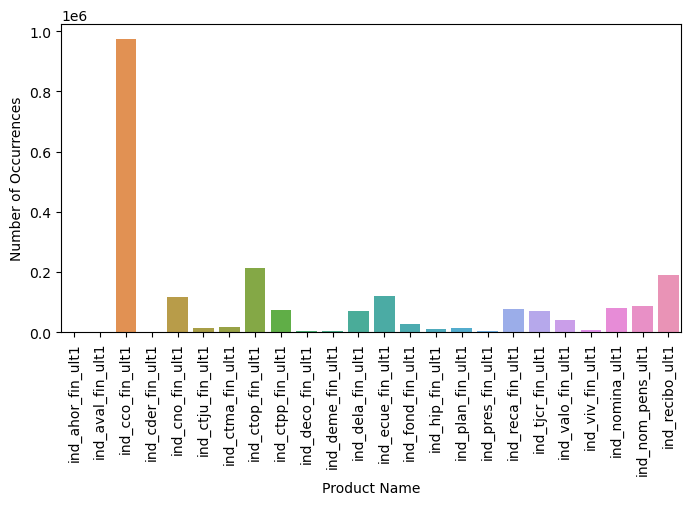

In [31]:
target_counts = df_train[df_train.columns[22:49]].sum(axis=0)
plt.figure(figsize=(8, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xlabel('Product Name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation='vertical')
plt.show()

In [32]:
#I build a age_bins column so that we can do EDA

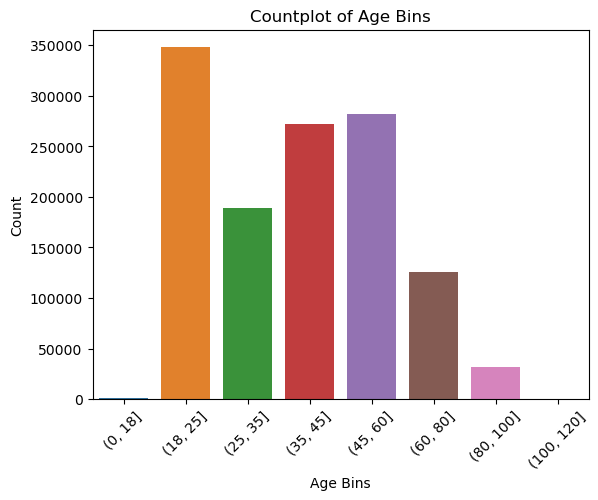

In [33]:
bin_ranges = [0, 18, 25, 35, 45, 60, 80, 100, 120]
df_train['age_bins'] = pd.cut(df_train['age'], bins=bin_ranges)
sns.countplot(data=df_train, x='age_bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Countplot of Age Bins')
plt.xticks(rotation=45) 
plt.show()

In [34]:
age_bins = [0, 18, 25, 35, 45, 60, 80, 100, 120]
df_train['Binned_No'] = pd.cut(df_train['age'], bins=age_bins, labels=False)

df_train['age_bins'].value_counts().sort_index()

(0, 18]         1113
(18, 25]      347966
(25, 35]      189489
(35, 45]      271896
(45, 60]      281996
(60, 80]      126104
(80, 100]      31436
(100, 120]         0
Name: age_bins, dtype: int64

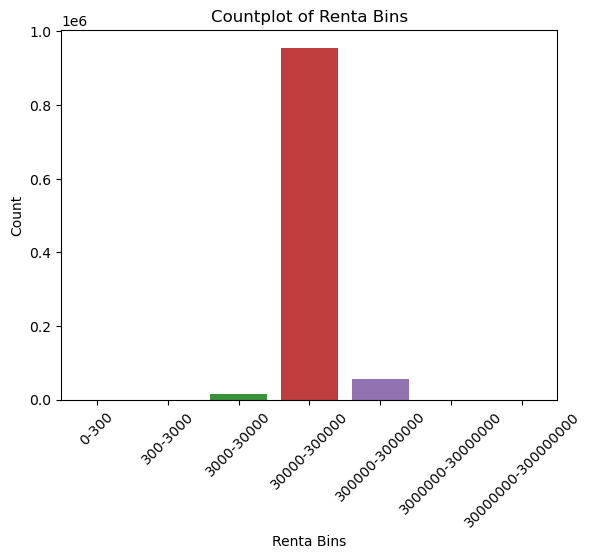

In [35]:
bins = [0, 300, 3000, 30000, 300000, 3000000, 30000000, 300000000]
labels = ['0-300', '300-3000', '3000-30000', '30000-300000', '300000-3000000', '3000000-30000000', '30000000-300000000']

df_train['renta_bins'] = pd.cut(df_train['renta'], bins=bins, labels=labels)
sns.countplot(data=df_train, x='renta_bins')
plt.xlabel('Renta Bins')
plt.ylabel('Count')
plt.title('Countplot of Renta Bins')
plt.xticks(rotation=45)  
plt.show()

In [36]:
#Customers having income between (30000, 300000] has the major Customer chunk. 
#There were no customers whose income was either less than 300 Euro or 30,000,000 Euro.

In [37]:
#Above 100, the customer count is very less, followed by an age of below 20.

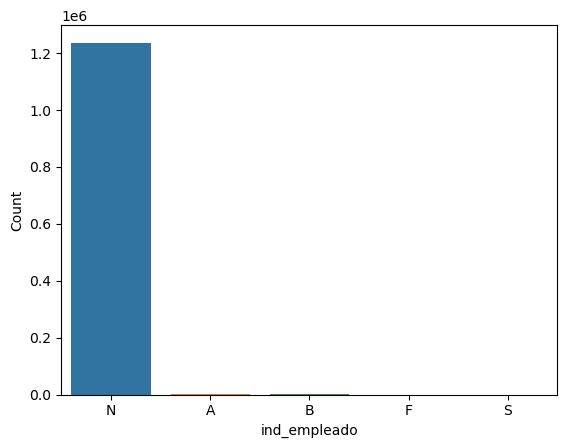

In [38]:
#ind_empleado
#Employee index: A active, B ex employed, F filial, N not employee, P/S passive.
sns.countplot(data=df_train, x="ind_empleado")
plt.xlabel("ind_empleado")
plt.ylabel("Count")
plt.show()

In [39]:
#’N’ has a major chunk of data

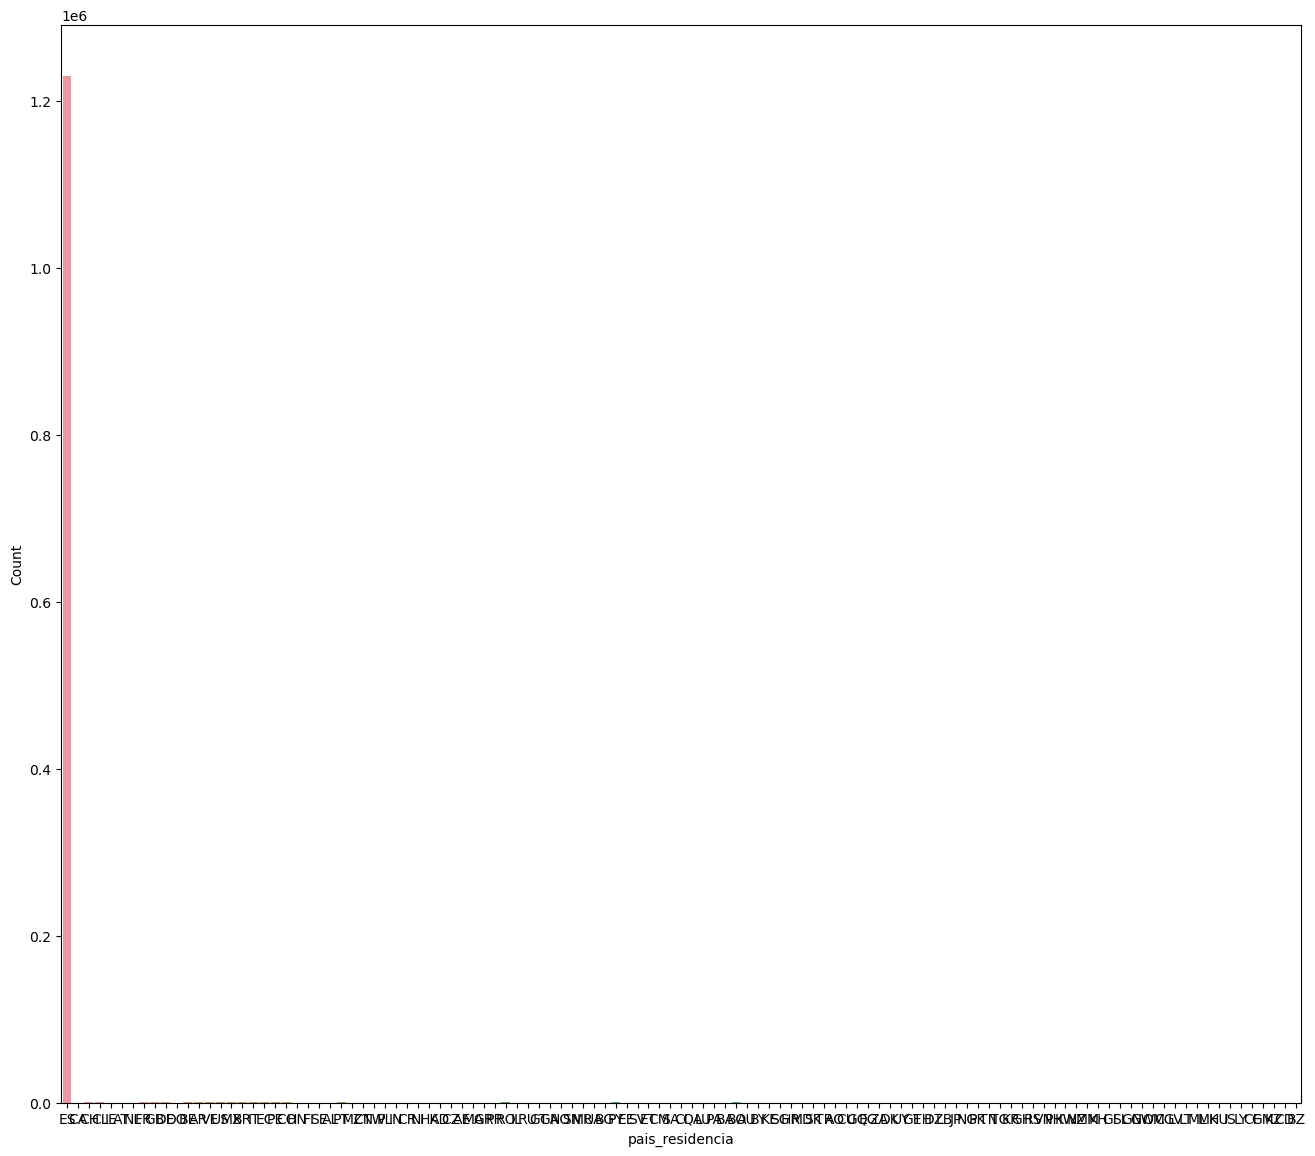

In [40]:
#pais_residencia
#M Two-digit Customer’s Country residence Loose Translation: country of residence.
plt.figure(figsize=(16, 14))
sns.countplot(data=df_train, x="pais_residencia")
plt.xlabel("pais_residencia")
plt.ylabel("Count")
plt.show()

In [41]:
#Note: As seen above ‘ind_empleado’ and ‘pais_residencia’ data is highly imbalanced,.

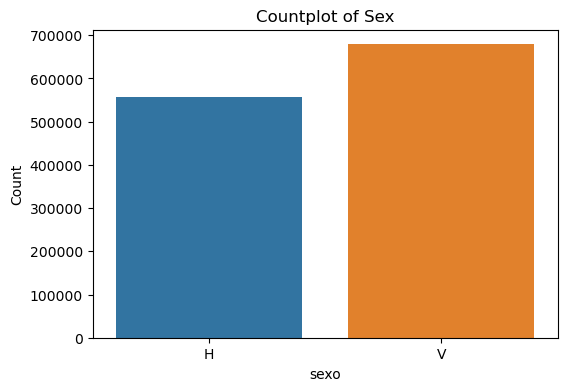

In [42]:
#SEXO customer’s Gender H-female (Hembra) / V-male (Varon)
plt.figure(figsize=(6, 4)) 
sns.countplot(data=df_train, x="sexo")
plt.xlabel("sexo")
plt.ylabel("Count")
plt.title("Countplot of Sex")
plt.show()

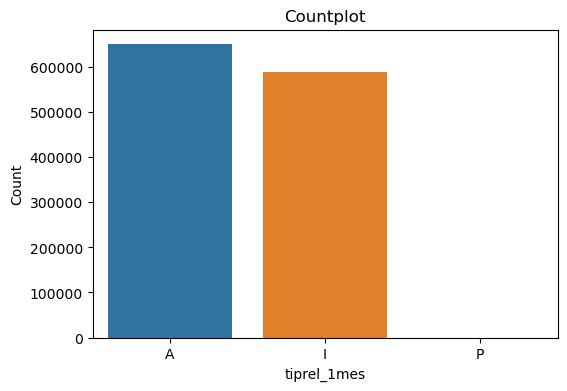

In [43]:
#tiprel_1mes
#Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer), R (Potential).
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x="tiprel_1mes")
plt.xlabel("tiprel_1mes")
plt.ylabel("Count")
plt.title("Countplot")
plt.show()

In [44]:
#There are only three categories for this feature in our dataset. Active , Inactive and Primary.

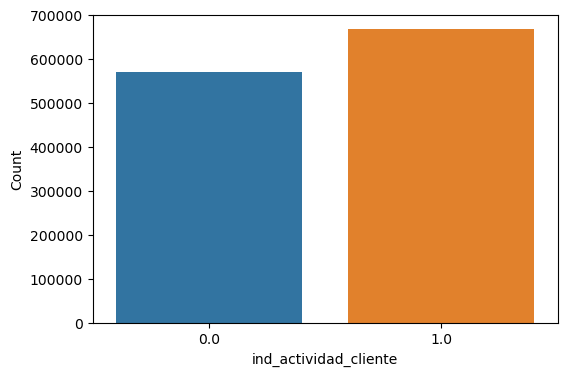

In [45]:
#ind_actividad_cliente
# Activity index (1 — active customer; 0 — inactive customer).
plt.figure(figsize=(6, 4)) 
sns.countplot(data=df_train, x="ind_actividad_cliente")
plt.xlabel("ind_actividad_cliente")
plt.ylabel("Count")
plt.show()

In [46]:
#Relatively this feature is a balance feature.

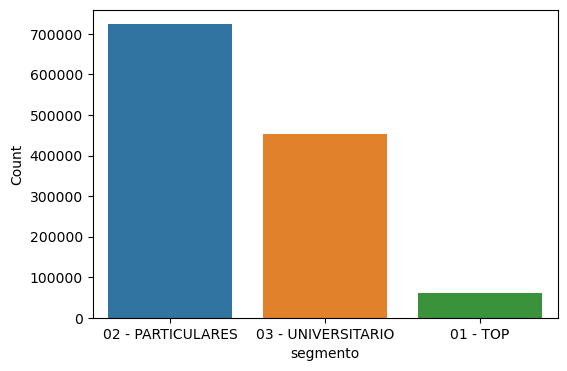

In [47]:
#segmento
#(segmentation: 01 — VIP, 02 — Individuals 03 — college graduated)
plt.figure(figsize=(6, 4)) 
sns.countplot(data=df_train, x="segmento")
plt.xlabel("segmento")
plt.ylabel("Count")
plt.show()

In [48]:
#PARTICULAR has the highest Customer count followed by UNIVERSITY  and TOP has the least segmentation

In [49]:
#Products

In [50]:
def plot_against_age_renta(product):
        count_by_age = df_train.groupby('age_bins')[product].sum()
        count_by_renta = df_train.groupby('renta_bins')[product].sum()
        
        # Plot Count by Age Bin
        plt.figure(figsize=(10, 6))
        sns.barplot(x=count_by_age.index, y=count_by_age.values)
        plt.xlabel('Age Bin')
        plt.ylabel('Count')
        plt.title('Count of ind_cno_fin_ult1 by Age Bin')
        plt.show()

        # Plot Count by Renta Bin
        plt.figure(figsize=(10, 6))
        sns.barplot(x=count_by_renta.index, y=count_by_renta.values)
        plt.xlabel('Renta Bin')
        plt.ylabel('Count')
        plt.xticks(rotation=45)  
        plt.title('Count of ind_cno_fin_ult1 by Renta Bin')
        plt.show()

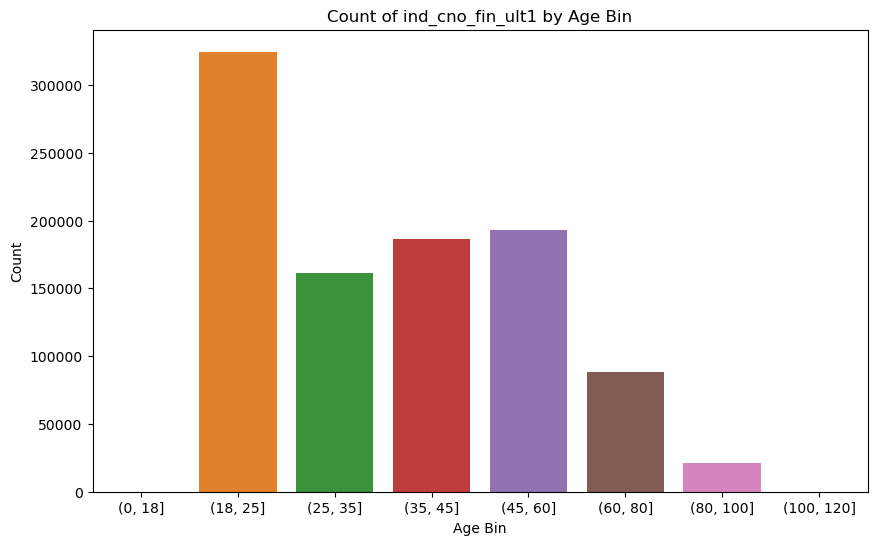

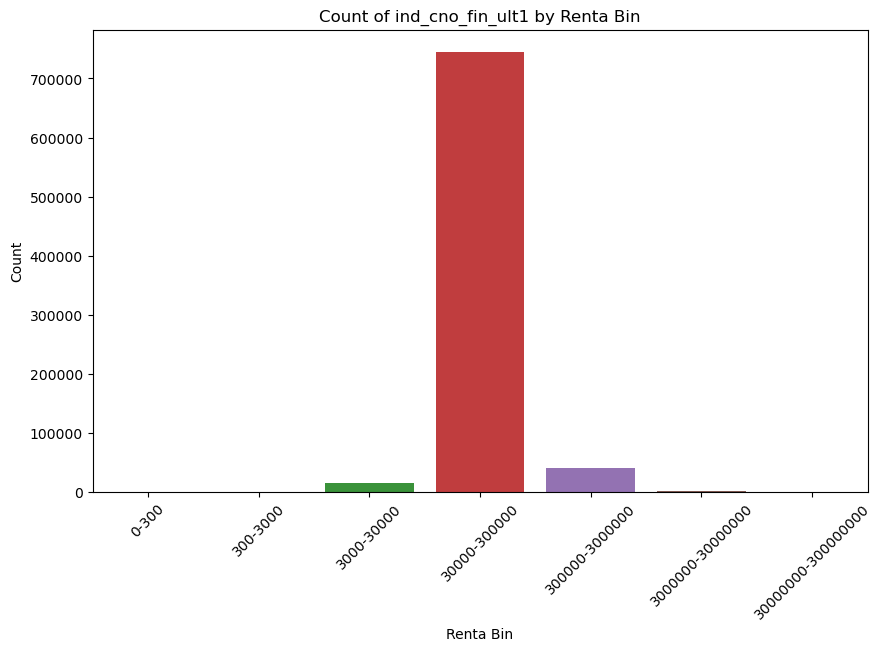

In [51]:
#ind_cco_fin_ult1(Current Accounts)
plot_against_age_renta('ind_cco_fin_ult1')

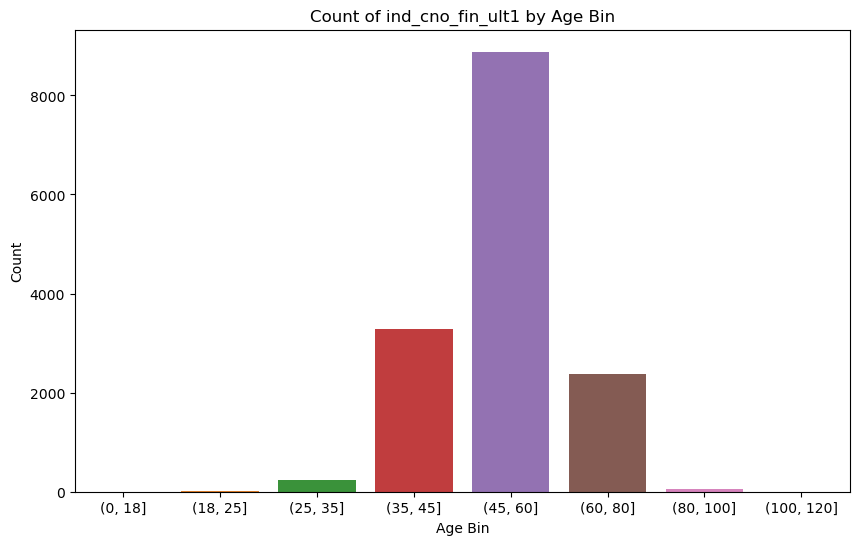

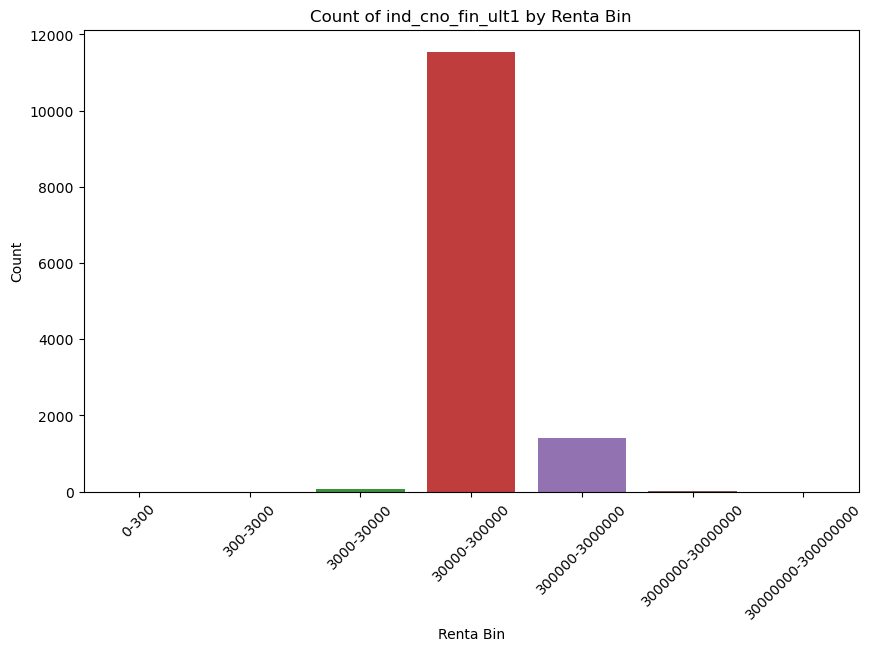

In [52]:
#ind_plan_fin_ult1(Pensions)
plot_against_age_renta('ind_plan_fin_ult1')

In [53]:
#Max Pensions accounts are opened by
#customers who fall under the age bin 45 to 60, and
#has income range from 30000 to 300000 Euro.

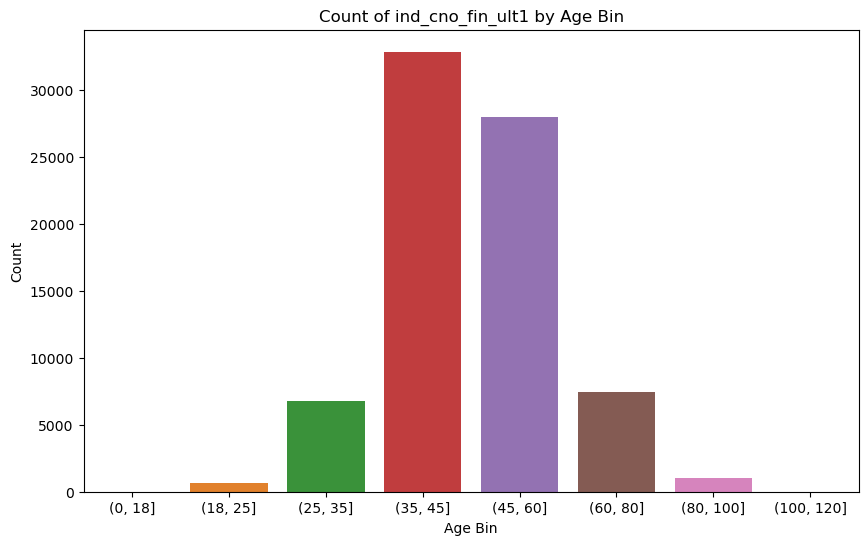

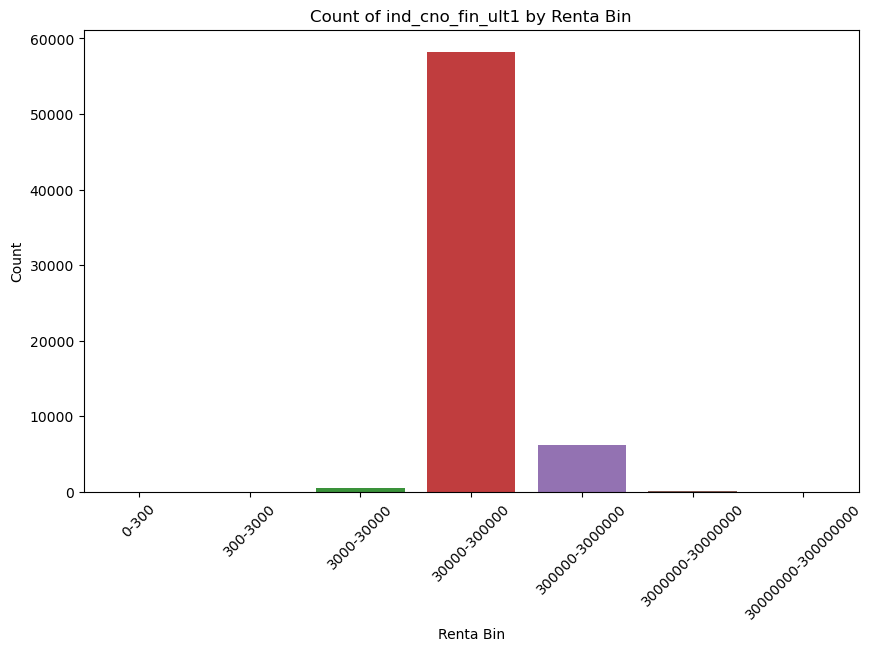

In [54]:
#ind_reca_fin_ult1(Taxes)
plot_against_age_renta('ind_reca_fin_ult1')

In [55]:
#Max Taxes accounts are opened by customers
#who fall under the age bin 35 to 45 and
#has an income range from 30000 to 300000 Euro.

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250000 entries, 0 to 1249999
Data columns (total 49 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   fecha_dato             1250000 non-null  object  
 1   ncodpers               1250000 non-null  int64   
 2   ind_empleado           1237124 non-null  object  
 3   pais_residencia        1237124 non-null  object  
 4   sexo                   1237120 non-null  object  
 5   age                    1250000 non-null  int64   
 6   fecha_alta             1237124 non-null  object  
 7   ind_nuevo              1237124 non-null  float64 
 8   antiguedad             1250000 non-null  float64 
 9   indrel                 1237124 non-null  float64 
 10  indrel_1mes            1237124 non-null  float64 
 11  tiprel_1mes            1237124 non-null  object  
 12  indresi                1237124 non-null  object  
 13  indext                 1237124 non-null  object  
 14  ca

In [57]:
df_train.drop('age_bins',axis=1,inplace=True)  
df_train.drop('Binned_No',axis=1,inplace=True)  
df_train.drop('renta_bins',axis=1,inplace=True)  

In [58]:
#Encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [60]:
df_train['pais_residencia'] = df_train['pais_residencia'].fillna('Missing')
df_train['canal_entrada'] = df_train['canal_entrada'].fillna('Missing')

In [61]:
def label_encode(df,col_name):
        lablel_encoder= LabelEncoder()
        df[col_name] =  lablel_encoder.fit_transform(df[col_name])

In [62]:
label_encode_cols = ['pais_residencia', 'canal_entrada']
for col in label_encode_cols:
     label_encode(df_train,col)

In [63]:
#category columns

In [64]:
cat_columns = ['ind_empleado', 'sexo', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
                'indfall','tipodom','ind_actividad_cliente', 'segmento']
for col in cat_columns:
    df_train[col] = df_train[col].fillna(-1)

In [65]:
one_hot_encoded = pd.get_dummies(df_train[cat_columns],columns=cat_columns ,drop_first=True)
df_train = pd.concat([df_train, one_hot_encoded], axis=1)

In [66]:
df_train.drop(cat_columns,axis=1,inplace=True)


In [67]:
df_train.drop( 'nomprov',axis=1,inplace=True)

In [68]:
df_train.drop('fecha_dato',axis=1,inplace=True)
df_train.drop('fecha_alta',axis=1,inplace=True)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250000 entries, 0 to 1249999
Data columns (total 60 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   ncodpers                     1250000 non-null  int64  
 1   pais_residencia              1250000 non-null  int64  
 2   age                          1250000 non-null  int64  
 3   antiguedad                   1250000 non-null  float64
 4   canal_entrada                1250000 non-null  int64  
 5   cod_prov                     1250000 non-null  float64
 6   renta                        1250000 non-null  float64
 7   ind_ahor_fin_ult1            1250000 non-null  int64  
 8   ind_aval_fin_ult1            1250000 non-null  int64  
 9   ind_cco_fin_ult1             1250000 non-null  int64  
 10  ind_cder_fin_ult1            1250000 non-null  int64  
 11  ind_cno_fin_ult1             1250000 non-null  int64  
 12  ind_ctju_fin_ult1            1250000 non-n

In [70]:
product_col = [
 'ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
 'ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1',
 'ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1',
 'ind_nom_pens_ult1','ind_recibo_ult1']

In [71]:
df_train['consolidate_p'] = ''
for i in range(len(product_col)):
    df_train['consolidate_p'] += df_train[product_col[i]].astype(str)
    
df_train['consolidate_p'].value_counts()

0010000000000000000000.00.00    647576
0010000100000000000000.00.00     82770
0000000100000000000000.00.00     48158
0010000000000000000000.00.01     41838
0000000000000000000000.00.00     34444
                                 ...  
0010001000011000001000.00.01         1
0000100110001110001101.01.01         1
0010000010000001010000.01.01         1
0010000010000001010010.00.01         1
0000100000001001011000.01.00         1
Name: consolidate_p, Length: 7696, dtype: int64

In [72]:
filter_df = df_train[df_train['consolidate_p'].map(df_train['consolidate_p'].value_counts()) > 10000]
filter_df.head()

,ncodpers,pais_residencia,age,antiguedad,canal_entrada,cod_prov,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,indext_S,indfall_N,indfall_S,tipodom_1.0,ind_actividad_cliente_0.0,ind_actividad_cliente_1.0,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO,consolidate_p
0,1375586,34,35,6.0,151,29.0,87218.10,0,0,1,...,0,1,0,1,0,1,0,1,0,0010000000000000000000.00.00
1,1050611,34,23,35.0,148,13.0,35548.74,0,0,1,...,1,1,0,1,1,0,0,0,1,0010000000000000000000.00.00
2,1050612,34,23,35.0,148,13.0,122179.11,0,0,1,...,0,1,0,1,1,0,0,0,1,0010000000000000000000.00.00
4,1050614,34,23,35.0,148,50.0,0.00,0,0,1,...,0,1,0,1,0,1,0,0,1,0010000000000000000000.00.00
5,1050615,34,23,35.0,148,45.0,22220.04,0,0,1,...,0,1,0,1,1,0,0,0,1,0010000000000000000000.00.00


In [73]:
filter_df.drop(product_col, axis=1, inplace=True)

le = LabelEncoder()
filter_df['consolidate_p']=le.fit_transform(filter_df['consolidate_p'])
filter_df['consolidate_p'].unique()

array([ 5,  6,  7,  0,  1,  4,  8,  3,  9, 10,  2])

In [74]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939360 entries, 0 to 1249999
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ncodpers                     939360 non-null  int64  
 1   pais_residencia              939360 non-null  int64  
 2   age                          939360 non-null  int64  
 3   antiguedad                   939360 non-null  float64
 4   canal_entrada                939360 non-null  int64  
 5   cod_prov                     939360 non-null  float64
 6   renta                        939360 non-null  float64
 7   ind_empleado_A               939360 non-null  uint8  
 8   ind_empleado_B               939360 non-null  uint8  
 9   ind_empleado_F               939360 non-null  uint8  
 10  ind_empleado_N               939360 non-null  uint8  
 11  ind_empleado_S               939360 non-null  uint8  
 12  sexo_H                       939360 non-null  uint8  
 13

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

In [76]:
X=filter_df.drop('consolidate_p',axis=1)
y=filter_df['consolidate_p']

In [77]:
X.isnull().sum()
X.drop('cod_prov',axis=1)

,ncodpers,pais_residencia,age,antiguedad,canal_entrada,renta,ind_empleado_A,ind_empleado_B,ind_empleado_F,ind_empleado_N,...,indext_N,indext_S,indfall_N,indfall_S,tipodom_1.0,ind_actividad_cliente_0.0,ind_actividad_cliente_1.0,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO
0,1375586,34,35,6.0,151,87218.10,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,1050611,34,23,35.0,148,35548.74,0,0,0,1,...,0,1,1,0,1,1,0,0,0,1
2,1050612,34,23,35.0,148,122179.11,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
4,1050614,34,23,35.0,148,0.00,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
5,1050615,34,23,35.0,148,22220.04,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249994,1060020,34,24,34.0,148,228760.17,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
1249995,1060018,34,23,34.0,148,0.00,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
1249996,1060017,34,22,34.0,147,69159.12,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
1249997,1060016,34,22,34.0,148,79723.98,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestClassifier(n_jobs=-1, verbose=1)

In [79]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.3s finished


Accuracy:  0.8925832852133463
F1: 0.8925832852133463
Precision: 0.8925832852133463
Recall: 0.8925832852133463


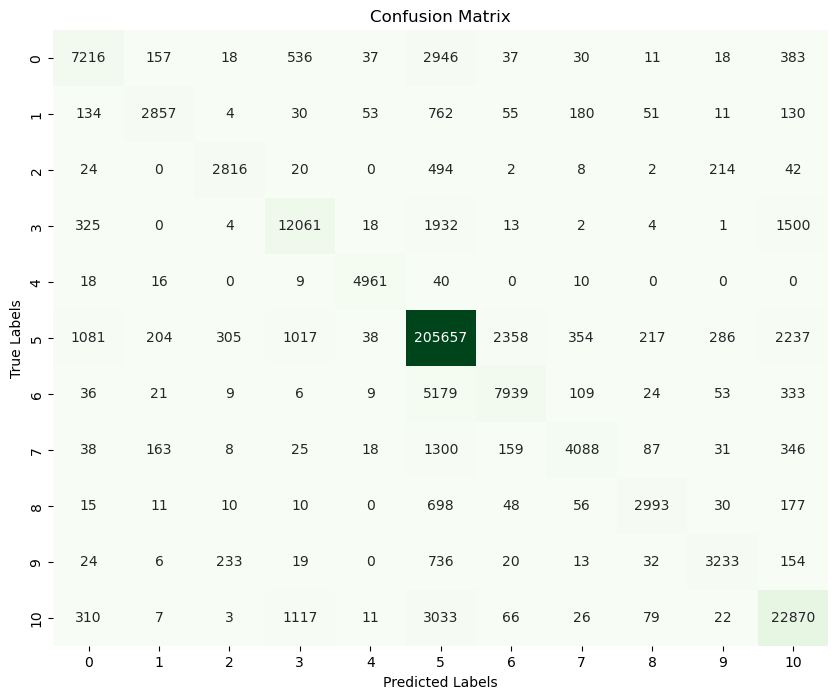

In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1:', f1_score(y_test, y_pred, average='micro'))
print ('Precision:', precision_score(y_test, y_pred, average='micro'))
print ('Recall:', recall_score(y_test, y_pred, average='micro'))
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap=plt.cm.Greens, fmt='d', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
X_train.info()

In [86]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=6,n_estimators=50,objective='multi:softprob')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [87]:
Y_preds=model.predict(X_test)

Accuracy:  0.7560977970186039
F1: 0.7560977970186039
Precision: 0.7560977970186039
Recall: 0.7560977970186039


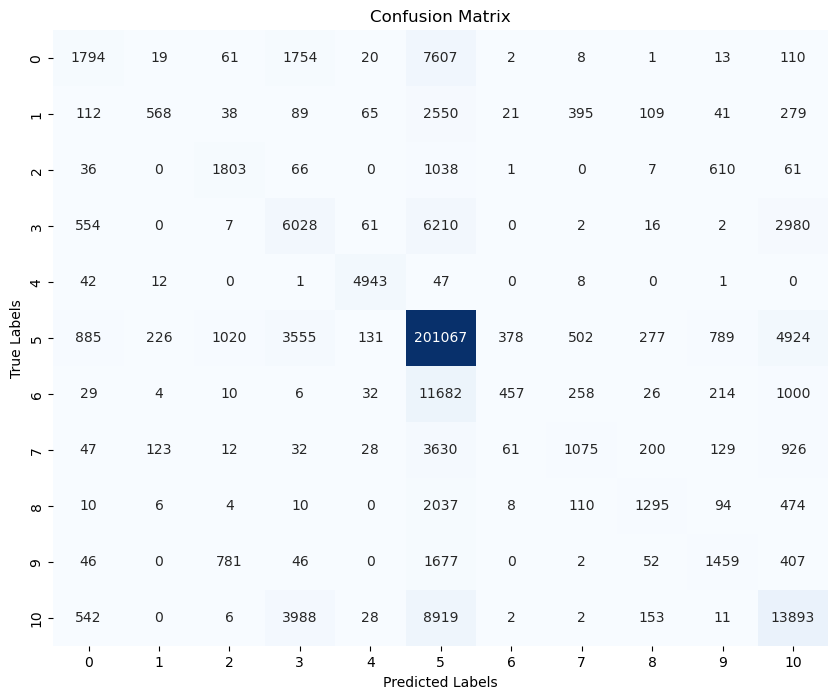

In [88]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix
print ('Accuracy: ', accuracy_score(y_test, Y_preds))
print ('F1:', f1_score(y_test, Y_preds, average='micro'))
print ('Precision:', precision_score(y_test, Y_preds, average='micro'))
print ('Recall:', recall_score(y_test, Y_preds, average='micro'))
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
confusion = confusion_matrix(y_test, Y_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap=plt.cm.Blues, fmt='d', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print ('accuracy: ', accuracy_score(y_test, Y_preds))

In [ ]:
def runXGB(train_X, train_y, colsample_bytree=0.9, max_depth= 6, eta=0.05, min_child_weight=2, subsample=0.9, num_rounds=110):
    param = {}
    param['objective'] = 'multi:softprob'
    param['seed'] = 0
    param['silent'] = 0
    param['eval_metric'] = "mlogloss"
    param['booster'] = 'gbtree'
    param['num_class'] = 24
    param['colsample_bytree'] = colsample_bytree
    param['max_depth'] = max_depth 
    param['eta'] = eta
    param['min_child_weight'] = min_child_weight
    param['subsample'] = subsample
    num_round = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    model = xgb.train(plst, xgtrain, num_round)
    return model

In [ ]:
demographic_cols = ['fecha_dato',
 'ncodpers','ind_empleado','pais_residencia','sexo','age','fecha_alta','ind_nuevo','antiguedad','indrel',
 'indrel_1mes','tiprel_1mes','indresi','indext','conyuemp','canal_entrada','indfall',
 'tipodom','cod_prov','ind_actividad_cliente','renta','segmento']

notuse = ["ult_fec_cli_1t","nomprov"]

product_col = [
 'ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
 'ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1',
 'ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1',
 'ind_nom_pens_ult1','ind_recibo_ult1']

In [ ]:
df_train.info()

In [ ]:
# train_encoded.drop(cat_columns, axis=1, inplace=True)

In [ ]:
one_hot_df

In [ ]:
df_train['states'] = df_train['states'].fillna('Missing')
missing_label = 'Missing'
df_train['states'] = np.where(df_train['states'].isnull(), missing_label, df_train['states'])

In [ ]:


        #label encode columns
        